Fitting 5 folds for each of 100 candidates, totalling 500 fits
Mean Absolute Error (MAE): 2062.7999992230157
Root Mean Squared Error (RMSE): 2760.8616095854595
R-squared: 0.6940804086765566


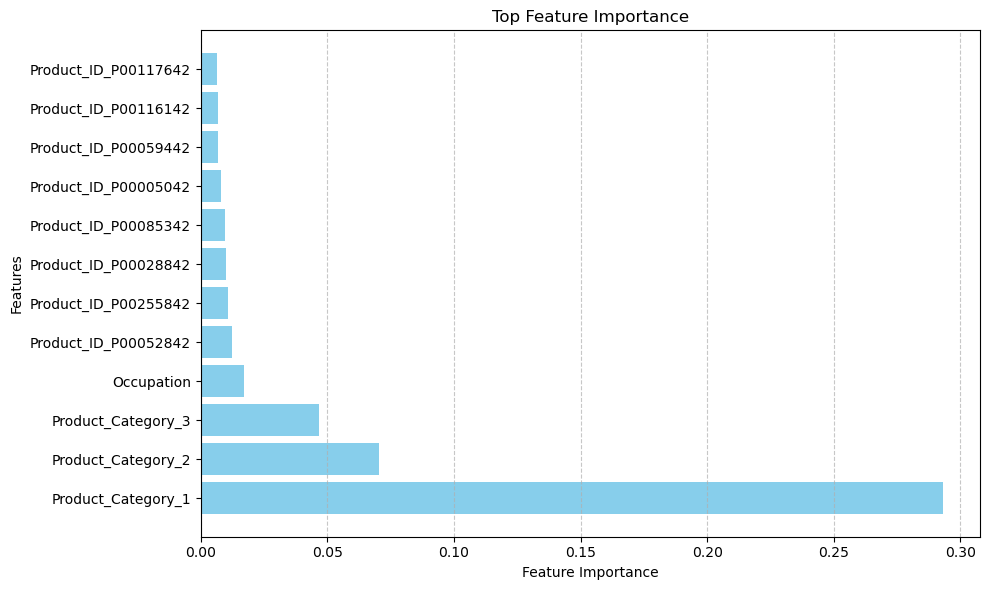

['random_forest_model_best.pkl']

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import joblib
import matplotlib.pyplot as plt

# Loading the dataset(only the first 100000)
data = pd.read_csv('cleaned_median.csv', nrows=100000)

# Dropping unnecessary columns
data = data.drop(columns=['User_ID'])

# Separating features and target(Purchase)
X = data.drop(columns=['Purchase'])
y = data['Purchase']

# Encoding for categorical features
X_encoded = pd.get_dummies(X, drop_first=True)

# Splitting the data into training and testing sets(80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Defining the hyperparameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': [50, 100, 150, 200, 250],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Initialising the model and RandomizedSearchCV and setting it up(with 100 iterations, 5-fold cross-validation)
model = RandomForestRegressor(random_state=42)
rand_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, 
                                 n_iter=100, cv=5, n_jobs=-1, random_state=42, verbose=2)

# Fitting the model using RandomizedSearchCV
rand_search.fit(X_train, y_train)
best_model = rand_search.best_estimator_

# Evaluating model performance
y_pred = best_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r_squared = best_model.score(X_test, y_test)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared: {r_squared}")

# Feature importance
importances = best_model.feature_importances_
indices = np.argsort(importances)[::-1]
top_n = 12

# Plotting top feature importances
plt.figure(figsize=(10, 6))
plt.title('Top Feature Importance')
plt.barh(range(top_n), importances[indices][:top_n], align='center', color='skyblue')
plt.yticks(range(top_n), X_encoded.columns[indices][:top_n])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Save the best model for future use
joblib.dump(best_model, 'random_forest_model_best.pkl')
